Basic imports and system settings 

In [110]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [111]:
pd.set_option("display.max_rows", 500)                  # to display maximum 500 rows
pd.set_option("display.max_columns", 500)               # to display maximum 500 columns

In [112]:
# Check for the version of the libraries 
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)

Pandas version:  1.3.5
Seaborn version:  0.12.2
Matplotlib version:  3.5.3


Data colection

In [113]:
df = pd.read_csv("DS1_C6_S3_BazilHousing_Data_Hackathon.csv") 

In [114]:
df.head() # head prints the top 5 rows 

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [115]:
df.tail() # tail returns the bottom 5 rows

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [116]:
print(df.shape) #to check the number of rows and columns

(10692, 13)


In [117]:
print(df.columns) # array of columns in dataset 

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


In [118]:
df.info()       # the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


To check the number of of null values

In [119]:
df.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

# Hypotheses
##### A bief view of the data helps in some major hypothetical assumptions which might be proved either true or false during the course of analysis
* Property prices differs among different cities and some cities have higher properties prices;
* Acceptance of animals impact house prices ;
* Houses with a higher home owner's association tax have a higher rent value;
* Furnished houses have a positive impact on rent value, mentioning a higher rent value;
* The number of parking spaces impacts the rent value;
* The number of bathrooms have an impact on rooms;
* Wider area has larger rent value; 
* The acceptance of pets impacts the house area;
* Having multiple parking spaces increases the area; 
* Increase in number of floors increase the house area; 
* Some cities offer a wider area of houses;
* With an increase in floors, the fire insurance increases;
* Some cites have a higher rate of acceptance of pets 

### Functions in Use

Function to seperate columns into categorical and numerical

In [120]:
def sep(df):
    categorical = []
    continuous = []
    
    for column in df.columns:
        if df[column].nunique() < 15:
            categorical.append(column)
            
        else:
            continuous.append(column)
                
    return categorical, continuous

categorical, continuous = sep(df)

table ={"Categorical":categorical, "Continuous":continuous}
print(tabulate(table, headers=["Categorical","continuous"]))


Categorical     continuous
--------------  -------------------
city            area
rooms           floor
bathroom        hoa (R$)
parking spaces  rent amount (R$)
animal          property tax (R$)
furniture       fire insurance (R$)
                total (R$)


Function to create the necessary visualizations

In [121]:
def plot_graph(data = df, type = None, col = None, col2 = None, length = 15, width = 7, title = None, h = None):
    plt.figure(figsize = (length,width))
    x1 = data[col].value_counts()
    y1 = data[col].value_counts().index
    plt.title(title)
    if type == "pie": plt.pie(x1, labels = y1, autopct = "%.2f%%")
    elif type == "countplot": 
        if h == None: x = sns.countplot(x = data[col])
        else: x = sns.countplot(x = data[col], hue = data[h])
        for p in x.patches:
            x.annotate("{:.1f}".format((p.get_height()/10673)*100), (p.get_x(), p.get_height()+0.01))
    elif type == "histplot": sns.histplot(x = data[col], color = "m") 
    elif type == "barplot": sns.barplot(x = col, y = col2)
    elif type == "boxplot": sns.boxplot(x = data[col], color = "g") 
    plt.show()

Function to return all the information required for the categorical data level 1 analysis

In [122]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

### Assessment of Categorical Data

In [123]:
categorical

['city', 'rooms', 'bathroom', 'parking spaces', 'animal', 'furniture']

#### 1. Analysis of City

Unique values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city is São Paulo
Number of missing values in city is 0


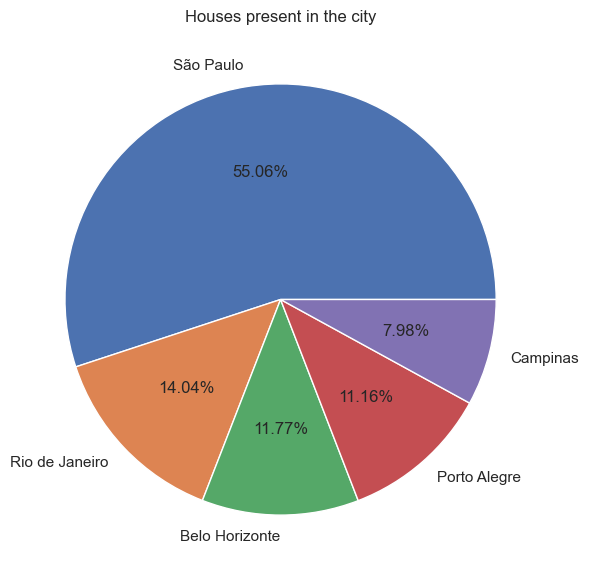

In [124]:
info_of_cat("city") 
plot_graph(type = "pie", col = "city", length = 7, width = 7, title = "Houses present in the city")

As we see from above pie chart ,we got to know Sao Paulo has highest number of house followed by Rio de Janerio at second position forming 69.1% of the total housing facilities available.
It can also be observed that Campinas form 7.98% of the total housing facilities

#### 2. Analysis of animal

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


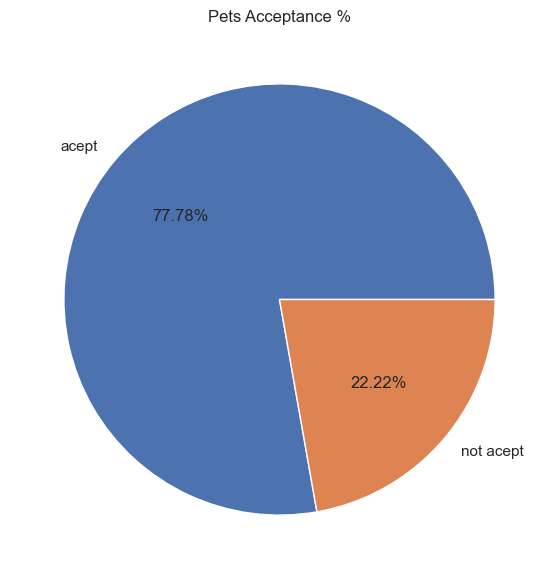

In [125]:
info_of_cat("animal")
plot_graph(type = "pie", col = "animal", length = 7, width = 7, title = "Pets Acceptance %")

Thus, maximum houses provide the facilties to accept pets nearing to 77.78% while around 22.22% houses do not accept pets

#### 3. Analysis of Furniture

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


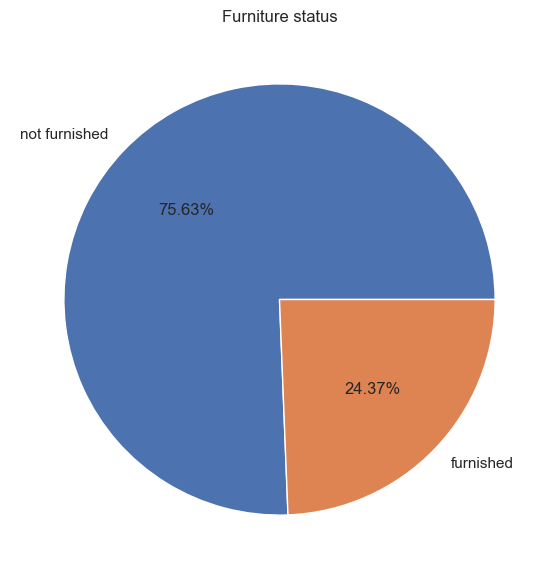

In [126]:
info_of_cat("furniture")
plot_graph(type = "pie", col = "furniture", length = 7, width = 7, title = "Furniture status")

This suggests that only 24.37% houses have a furnished furniture while a maximum percentage of 75.63% houses have not-furnished furniture which suggests that there are higher chances of additional investment to occupy non-furnished home

#### 4. Analysis of Rooms

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3
Number of missing values in rooms is 0


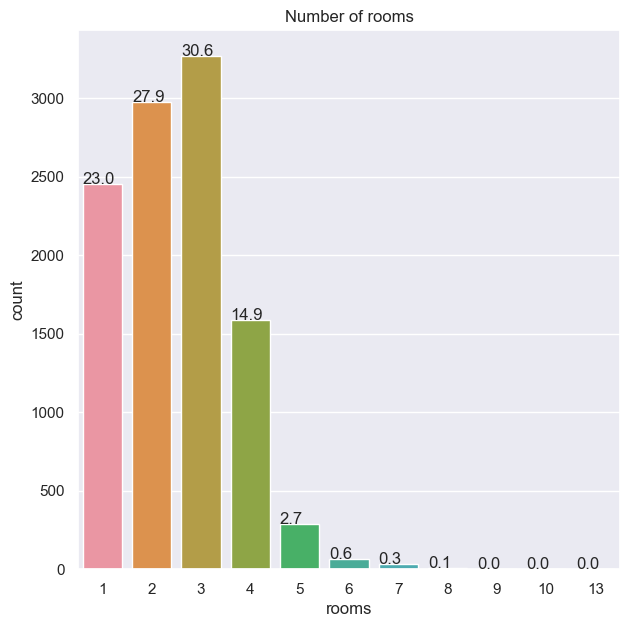

In [127]:
info_of_cat("rooms")
plot_graph(type = "countplot", col = "rooms", length = 7, width = 7, title = "Number of rooms")

Maximum houses contain 3 rooms followed by houses containing 2 rooms.
The number of rooms in most of the houses range from 1 - 4.
As the number of rooms increase from 5, the number of houses tend to fall. 

#### 4. Analysis of Parking Spaces

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


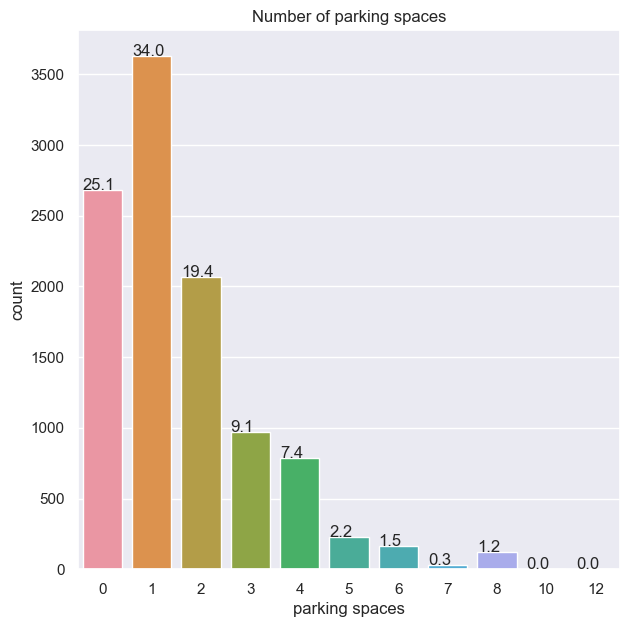

In [128]:
info_of_cat("parking spaces")
plot_graph(type = "countplot", col = "parking spaces", length = 7, width = 7, title = "Number of parking spaces")

Thus, it can be infered from above that maximum houses have 1 parking spaces.
While, it can also be observed that 25.1% houses have no parking at all, suggesting it difficult to be applicable to interested buyers with their own vehicle.
There is a general decline in the number of houses having parking spaces as 3 or more

#### Analysis of Bathrooms

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0


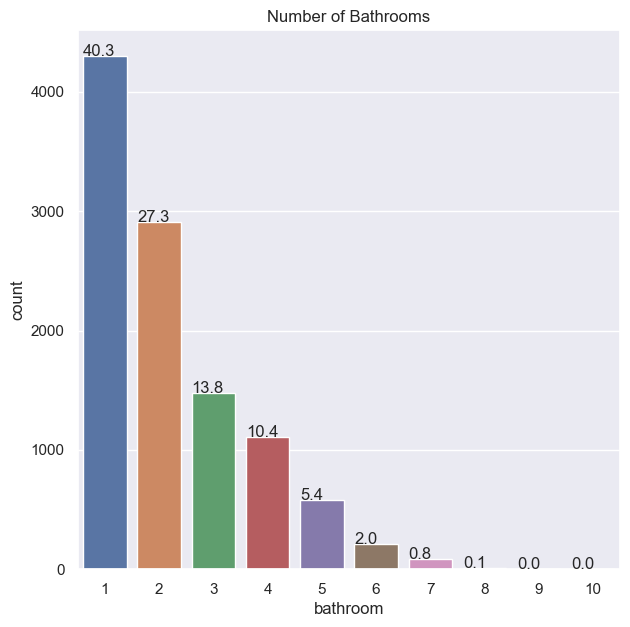

In [129]:
info_of_cat("bathroom")
plot_graph(type = "countplot", col = "bathroom", length = 7, width = 7, title = "Number of Bathrooms")

Maximum houses avail the facility of 1 - 2 bathrooms. There is general decline in the number of houses as the number of bathrooms increase

# Numerical / Continous Column Anaylsis

In [130]:
continuous

['area',
 'floor',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

Function to decribe the detail of the columns with numerical data

In [131]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

#### Analysis of Area

The mean of the area is 149.21791994014217
The median of the area is 90.0
The mode of the area is 50
The standard deviation of the area is 537.0169423364824
Number of missing values in the area is 0


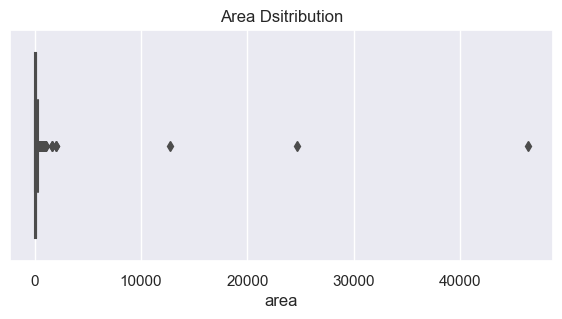

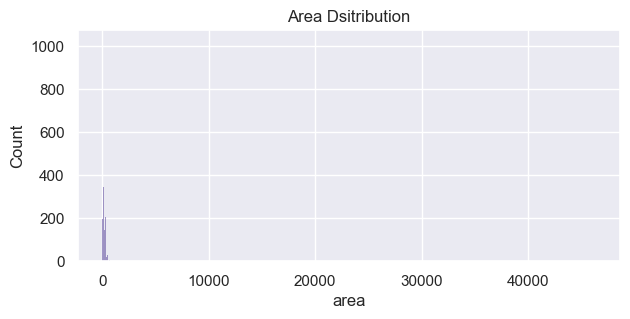

In [132]:
# Describing the data and plotting the boxplot and histogram to assess the skewness and distribution of the data
info_of_numerical("area")
plot_graph(type = "boxplot", col = "area", length = 7, width = 3, title = "Area Dsitribution")
plot_graph(type = "histplot", col = "area", length = 7, width = 3, title = "Area Dsitribution")

The data is right skewed with the 50% percentile of the houses in the range of 0 - 90 square kilometres

#### Analysis of Floor

In [133]:
df.floor.unique()

array([  7,  20,   6,   2,   1,   0,   4,   3,  10,  11,  24,   9,   8,
        17,  18,   5,  13,  15,  16,  14,  26,  12,  21,  19,  22,  27,
        23,  35,  25,  46,  28,  29, 301,  51,  32], dtype=int64)

One of the floor entry is reaching as high as 301 and needs to be checked with the client

The mean of the floor is 5.0679947624392065
The median of the floor is 3.0
The mode of the floor is 0
The standard deviation of the floor is 6.069050243218473
Number of missing values in the floor is 0


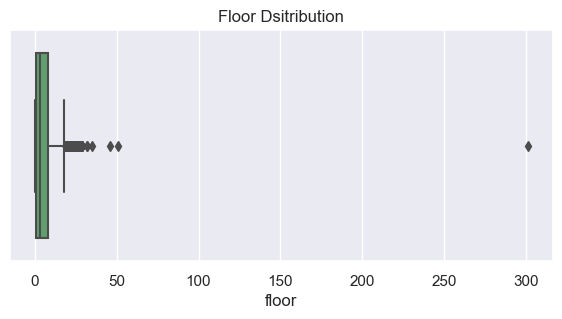

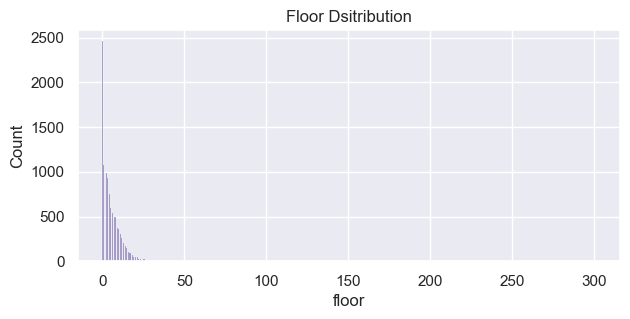

In [134]:
# Describing the data and plotting the boxplot and histogram to assess the skewness and distribution of the data
info_of_numerical("floor")
plot_graph(type = "boxplot", col = "floor", length = 7, width = 3, title = "Floor Dsitribution")
plot_graph(type = "histplot", col = "floor", length = 7, width = 3, title = "Floor Dsitribution")

Thus, it can be analysed thatas the number of floors increase the number of houses tend to fall significantly
It can also be said that almost 50 percentile of the total houses have 3 floors

#### Analysis of Home Owners Association Tax (R$)

The mean of the hoa (R$) is 1174.0216984661429
The median of the hoa (R$) is 560.0
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 15592.30524840384
Number of missing values in the hoa (R$) is 0


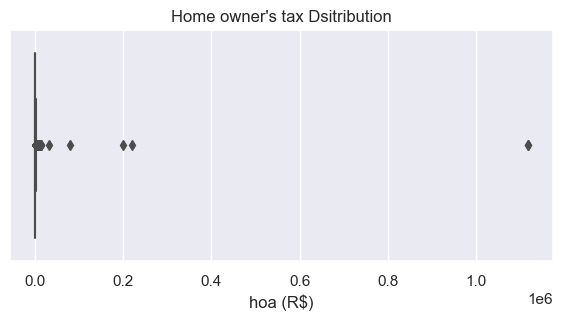

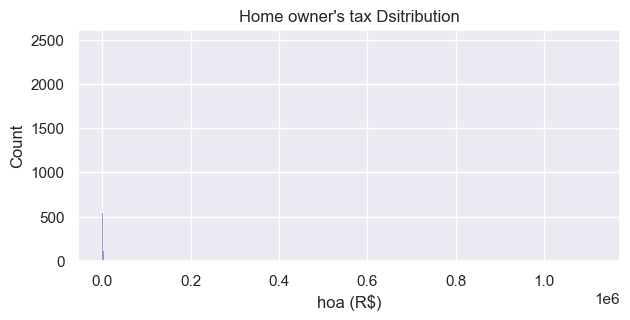

In [135]:
# Describing the data and plotting the boxplot and histogram to assess the skewness and distribution of the data
info_of_numerical("hoa (R$)")
plot_graph(type = "boxplot", col = "hoa (R$)", length = 7, width = 3, title = "Home owner's tax Dsitribution")
plot_graph(type = "histplot", col = "hoa (R$)", length = 7, width = 3, title = "Home owner's tax Dsitribution")

The data is right skewed
50 percentile of the houses have a house owners tax amounting to nearly $560

#### Analysis of Rent amount (R$)

The mean of the rent amount (R$) is 3896.247194163861
The median of the rent amount (R$) is 2661.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3408.5455176710675
Number of missing values in the rent amount (R$) is 0


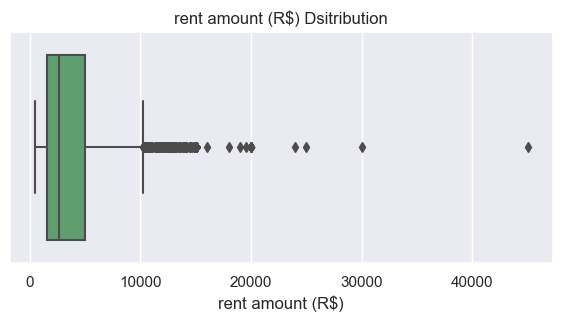

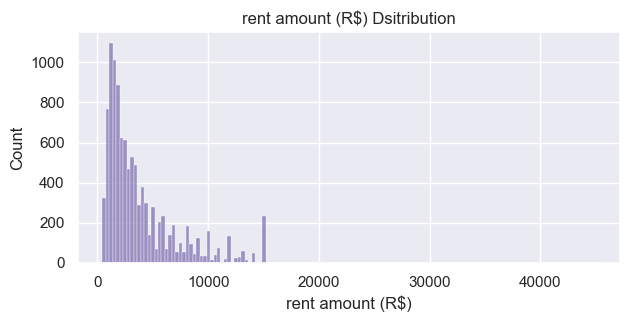

In [136]:
# Describing the data and plotting the boxplot and histogram to assess the skewness and distribution of the data
info_of_numerical("rent amount (R$)")
plot_graph(type = "boxplot", col = "rent amount (R$)", length = 7, width = 3, title = "rent amount (R$) Dsitribution")
plot_graph(type = "histplot", col = "rent amount (R$)", length = 7, width = 3, title = "rent amount (R$) Dsitribution")

It can be found that the rent amount data is right skewed.
Also, with an increase in the rent amount, the number of houses fall down.
Almost 50 percentile houses have a rent of $ 2661

#### Analysis of Property tax (R$)

The mean of the property tax (R$) is 366.70435839880287
The median of the property tax (R$) is 125.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3107.832321161876
Number of missing values in the property tax (R$) is 0


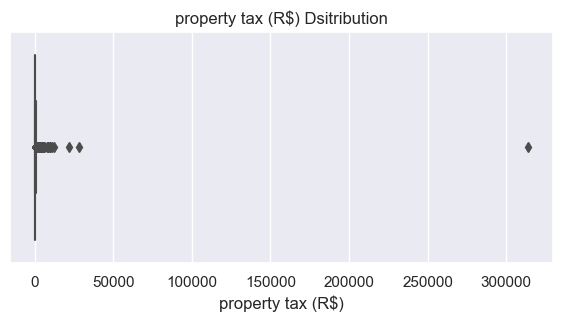

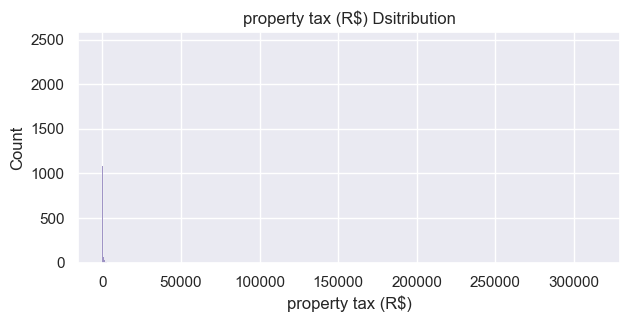

In [137]:
# Describing the data and plotting the boxplot and histogram to assess the skewness and distribution of the data
info_of_numerical("property tax (R$)")
plot_graph(type = "boxplot", col = "property tax (R$)", length = 7, width = 3, title = "property tax (R$) Dsitribution")
plot_graph(type = "histplot", col = "property tax (R$)", length = 7, width = 3, title = "property tax (R$) Dsitribution")

It can be found that the property tax amount data is right skewed.
Also, with an increase in the property tax amount, the number of houses fall down.
Almost 50 percentile houses have a property tax of $ 125

#### Analysis of Fire Insurance

The mean of the fire insurance (R$) is 53.300879161990274
The median of the fire insurance (R$) is 36.0
The mode of the fire insurance (R$) is 16
The standard deviation of the fire insurance (R$) is 47.76803093019706
Number of missing values in the fire insurance (R$) is 0


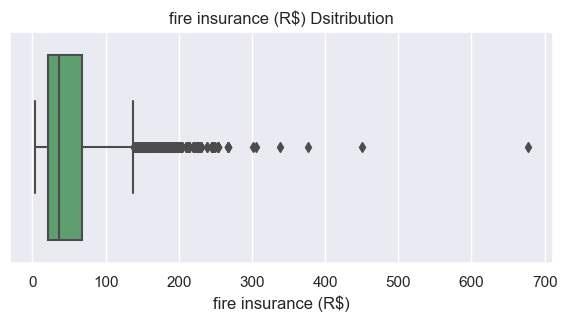

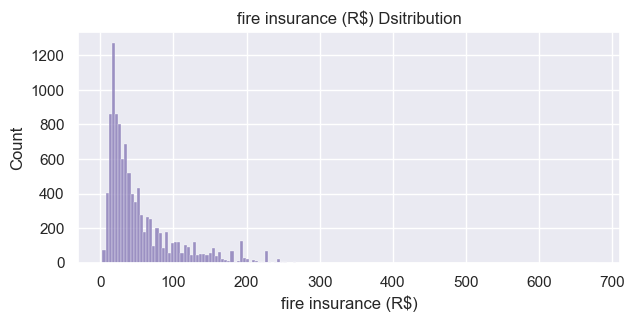

In [138]:
# Describing the data and plotting the boxplot and histogram to assess the skewness and distribution of the data
info_of_numerical("fire insurance (R$)")
plot_graph(type = "boxplot", col = "fire insurance (R$)", length = 7, width = 3, title = "fire insurance (R$) Dsitribution")
plot_graph(type = "histplot", col = "fire insurance (R$)", length = 7, width = 3, title = "fire insurance (R$) Dsitribution")

It can be found that the Fire Insurance data is right skewed.
Also, with an increase in the Fire Insurance the number of houses significantly fall down.
Almost 50 percentile houses have Fire Insurance of $ 36

#### Analysis of Total Cost $

The mean of the total (R$) is 5490.4869996258885
The median of the total (R$) is 3581.5
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 16484.725912350266
Number of missing values in the total (R$) is 0


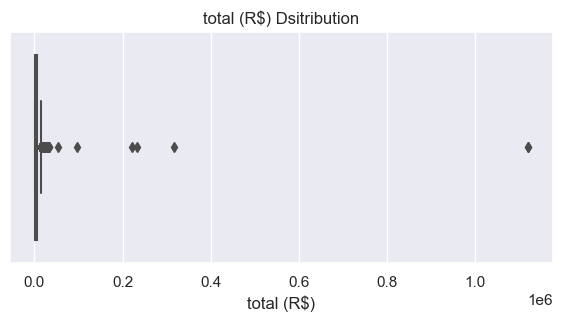

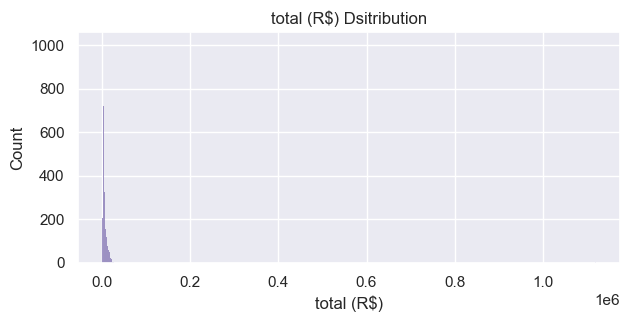

In [139]:
# Describing the data and plotting the boxplot and histogram to assess the skewness and distribution of the data
info_of_numerical("total (R$)")
plot_graph(type = "boxplot", col = "total (R$)", length = 7, width = 3, title = "total (R$) Dsitribution")
plot_graph(type = "histplot", col = "total (R$)", length = 7, width = 3, title = "total (R$) Dsitribution")

It can be found that the Total cost data is right skewed.
Also, with an increase in the Total cost the number of houses significantly fall down.
Almost 50 percentile houses have Total cost of $ 3582

## Assessing the presented hypothesis

In [140]:
x = print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           floor
bathroom        hoa (R$)
parking spaces  rent amount (R$)
animal          property tax (R$)
furniture       fire insurance (R$)
                total (R$)


In [141]:
pt = pd.pivot_table(data=df, values=['area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'hoa (R$)', 'total (R$)'], index = "city", aggfunc=["mean",'median'])
col = pt.columns
for col_n in col:pt[col_n] = round(pt[col_n].astype(float),2)
pt

mean                                               \
                  area bathroom floor hoa (R$) parking spaces rooms   
city                                                                  
Belo Horizonte  207.41     2.40  3.86  2324.20           1.96  3.02   
Campinas        137.56     1.96  4.28   628.92           1.56  2.36   
Porto Alegre    103.61     1.73  3.92   491.62           1.04  2.14   
Rio de Janeiro  105.35     1.76  5.25  1079.43           0.74  2.24   
São Paulo       158.90     2.47  5.63  1169.63           1.88  2.56   

                          median                                               \
               total (R$)   area bathroom floor hoa (R$) parking spaces rooms   
city                                                                            
Belo Horizonte    6315.24  110.0      2.0   2.0    300.0            2.0   3.0   
Campinas          3173.28   75.0      1.0   3.0    485.0            1.0   2.0   
Porto Alegre      2989.78   70.0      1.0   3.0    350.0            1.0   2.0   
Rio de Janeiro    4611.68   80.0      2.0   4.0    800.0            1.0   2.0   
São Paulo         6380.83  106.0      2.0   4.0    665.0            1.0   3.0   

                           
               total (R$)  
city                       
Belo Horizonte     3040.0  
Campinas           2140.0  
Porto Alegre       2211.0  
Rio de Janeiro     3253.0  
São Paulo          4596.0

In [142]:
pt.columns

MultiIndex([(  'mean',           'area'),
            (  'mean',       'bathroom'),
            (  'mean',          'floor'),
            (  'mean',       'hoa (R$)'),
            (  'mean', 'parking spaces'),
            (  'mean',          'rooms'),
            (  'mean',     'total (R$)'),
            ('median',           'area'),
            ('median',       'bathroom'),
            ('median',          'floor'),
            ('median',       'hoa (R$)'),
            ('median', 'parking spaces'),
            ('median',          'rooms'),
            ('median',     'total (R$)')],
           )

### Some cities offer a wider area of houses

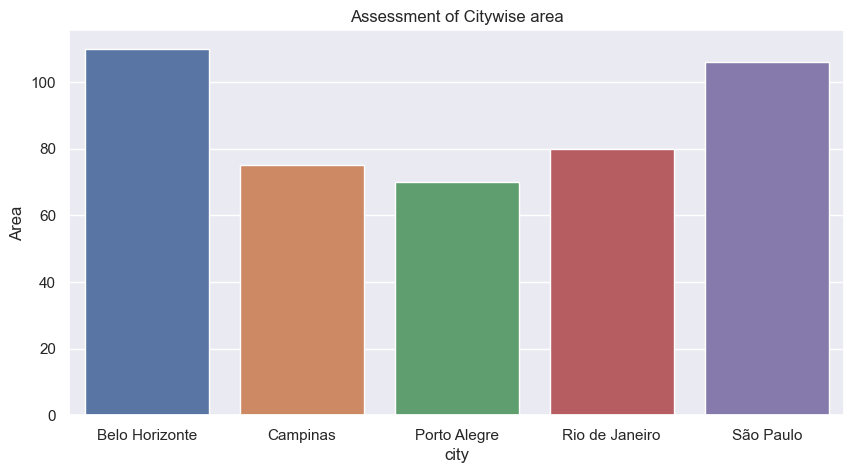

In [143]:
plt.figure(figsize = (10,5))
sns.barplot(x = pt.index, y = pt[("median", "area")])
plt.title("Assessment of Citywise area")
plt.ylabel("Area")
plt.show()

Thus, it can be concluded that the areas of all the different cities are statisitcally different and Belo Horizonte tops the bar in terms of approximate area which can be offered to prospective customers

### Property prices differs among different cities and some cities have higher properties prices

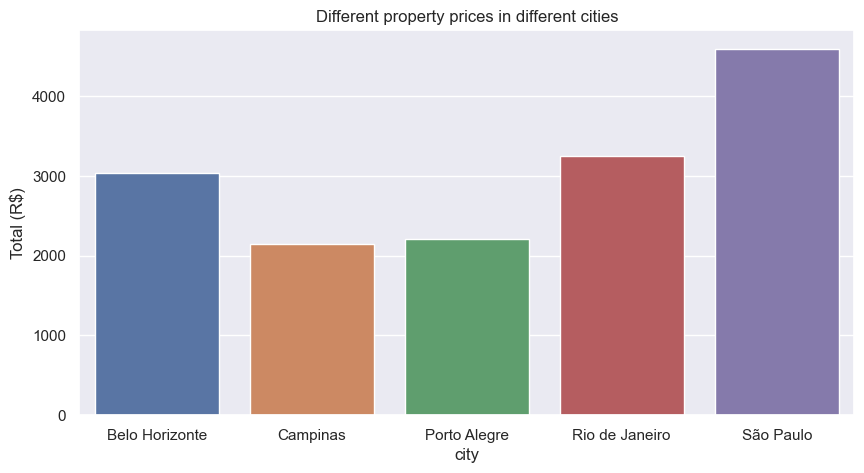

In [144]:
plt.figure(figsize = (10,5))
sns.barplot(x = pt.index, y = pt[("median","total (R$)")])
plt.title("Different property prices in different cities")
plt.ylabel("Total (R$)")
plt.show()

In [145]:
from scipy import stats

null = "The property prices of different cities are same"
alternate = "The property prices of the different cities are statisitcally different"

c1 = df[df["city"] == "Belo Horizonte"]["total (R$)"]
c2 = df[df["city"] == "Campinas"]["total (R$)"]
c3 = df[df["city"] == "Porto Alegre"]["total (R$)"]
c4 = df[df["city"] == "Rio de Janeiro"]["total (R$)"]
c5 = df[df["city"] == "São Paulo"]["total (R$)"]
stats, p_value, gmedian, tabl = stats.median_test(c1,c2,c3,c4,c5)
alpha = 0.5  #Confindence = 9.5 or 95%
print(f"P-Value = {p_value}")
if (p_value > alpha): print(null)
else: print(alternate)

P-Value = 3.701674188581716e-209
The property prices of the different cities are statisitcally different


Thus, Sao Paulo followed by Rio de Janeiro have the highest estimated prices with the lowest prices in Campinas

### Acceptance of animals impact house prices 

                  mean  median
animal                        
acept      4019.685786  2791.5
not acept  3464.212121  2385.0


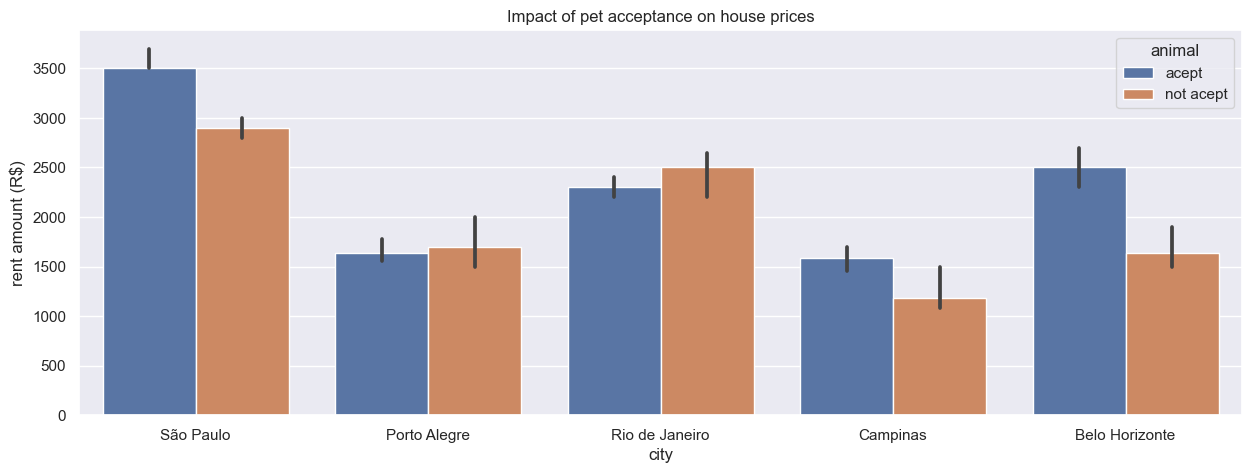

In [146]:
city = df.groupby('animal')['rent amount (R$)'].agg(["mean", "median"])
print(city)
plt.figure(figsize= (15,5))
sns.barplot(x= df['city'], y= df['rent amount (R$)'],hue=df['animal'],estimator= np.median)
plt.title("Impact of pet acceptance on house prices")
plt.show()

In can be noted that the price of houses for animal owners is high in most cases except for Rio de Janeiro and Porto Alegre

### Houses with a higher home owner's association tax have a higher rent value

city
Belo Horizonte    2324.197138
Campinas           628.922626
Porto Alegre       491.618609
Rio de Janeiro    1079.432378
São Paulo         1169.627994
Name: hoa (R$), dtype: float64


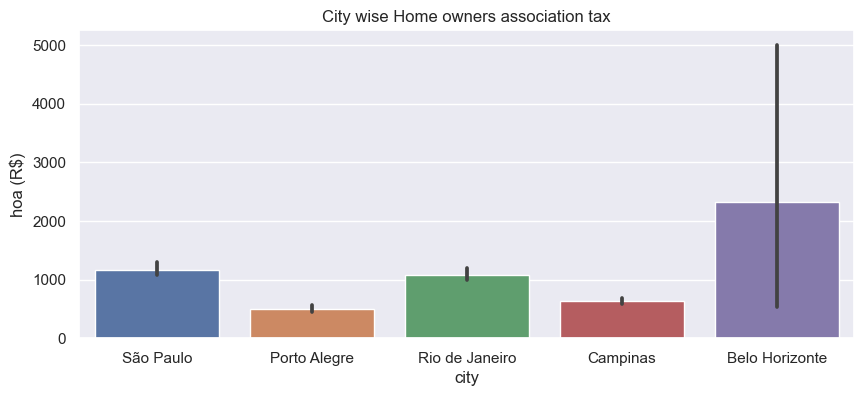

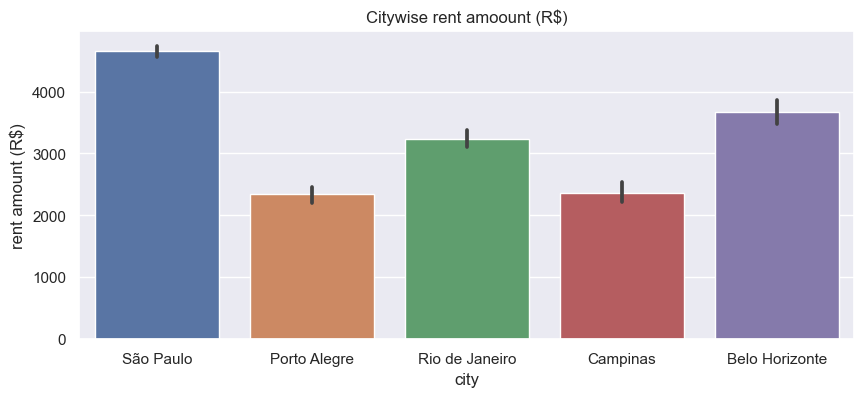

,rent amount (R$),hoa (R$)
rent amount (R$),1.00000,0.03649
hoa (R$),0.03649,1.00000


In [147]:
print(df.groupby('city')['hoa (R$)'].mean())
plt.figure(figsize=(10,4))
sns.barplot(x='city',y = 'hoa (R$)',data= df)
plt.title("City wise Home owners association tax")
plt.show()
df.groupby('city')['rent amount (R$)'].mean()
plt.figure(figsize=(10,4))
sns.barplot(x='city',y = 'rent amount (R$)',data= df)
plt.title("Citywise rent amoount (R$)")
plt.show()

corresp = df[['rent amount (R$)','hoa (R$)']].corr()
corresp

No ,There is no relation between home owner's association tax and the value of rent, because the city with the top value of comdominum is Rio de Janeiro and the city with the highiest rent value is São Paulo and the Pearson correlation between them is weak 0.30.

### Furnished houses have a positive impact on rent value, mentioning a higher rent value

<Figure size 1500x600 with 0 Axes>

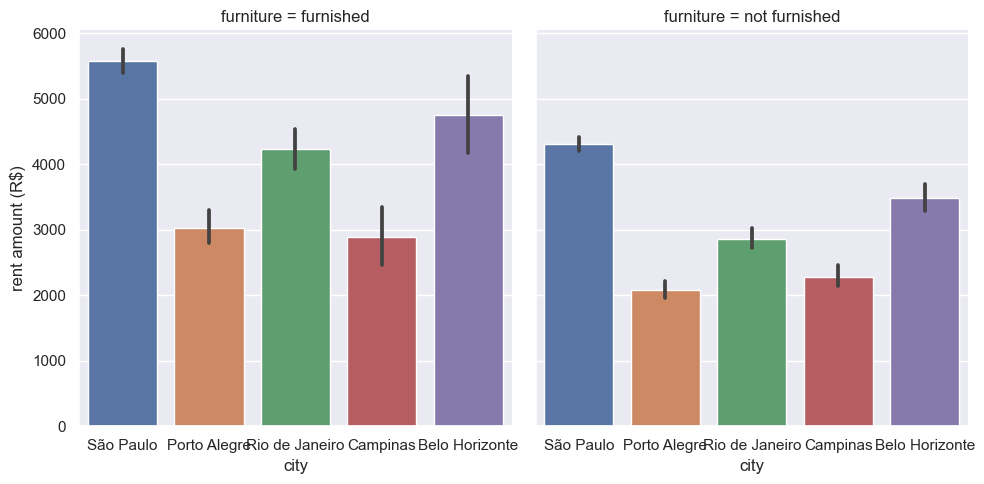

In [148]:
df.groupby('furniture')['rent amount (R$)'].mean()
plt.figure(figsize=(15,6))
sns.catplot(x='city',y ='rent amount (R$)',col = 'furniture',kind= 'bar',data= df)
plt.show()

Yes , properties with furniture is more expensive to rent on average 1200 currency notes and the graph shows that all cities have the same pattern.

### The number of parking spaces impacts the rent value

parking spaces
0     2140.854268
1     2602.666116
2     4525.238647
3     6430.960744
4     7752.551331
5     8278.117391
6     8867.846626
7     9486.363636
8     8704.325203
10    8950.000000
12    6900.000000
Name: rent amount (R$), dtype: float64


,rent amount (R$),parking spaces
rent amount (R$),1.000000,0.578361
parking spaces,0.578361,1.000000


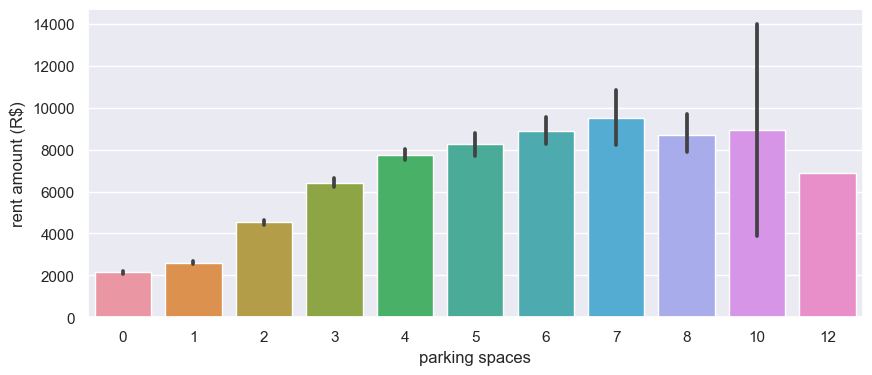

In [149]:
print(df.groupby('parking spaces')['rent amount (R$)'].mean())

plt.figure(figsize=(10,4))
sns.barplot(x= 'parking spaces', y= 'rent amount (R$)', data= df)

corresp = df[['rent amount (R$)','parking spaces']].corr()
corresp

Yes , from 0 to 7 the number of parking spaces impact on prices , just when we have 8 parking spaces the value is a little bit lower than 7 and 10 parking spaces is lower than 2 parking spaces.
We have a correlation of 0.56 between the price and the number of vacancies confirming the idea that the number of vacancies is related to the value of the property.

### The number of bathrooms have an impact on rooms

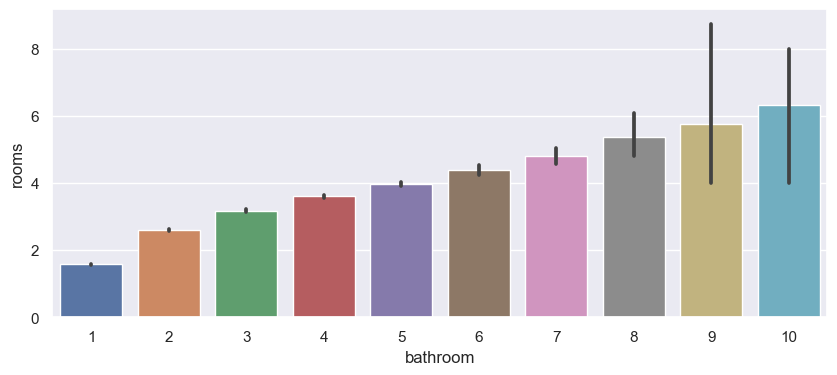

,bathroom,rooms
bathroom,1.000000,0.733763
rooms,0.733763,1.000000


In [150]:
#Wider area has larger rent value
plt.figure(figsize=(10,4))
sns.barplot(x= 'bathroom', y= 'rooms', data= df)
plt.show()
corresp = df[['bathroom','rooms']].corr()
corresp

Thus, it can be assessed that the number of bathrooms have a higher correlation with the number of rooms with a strong correlation of 0.73. Thus, an increase in number of rooms would lead to an increase in number of bathrooms

### The acceptance of pets impacts the house area

                 mean  median
animal                       
acept      160.591871   100.0
not acept  109.409091    70.0


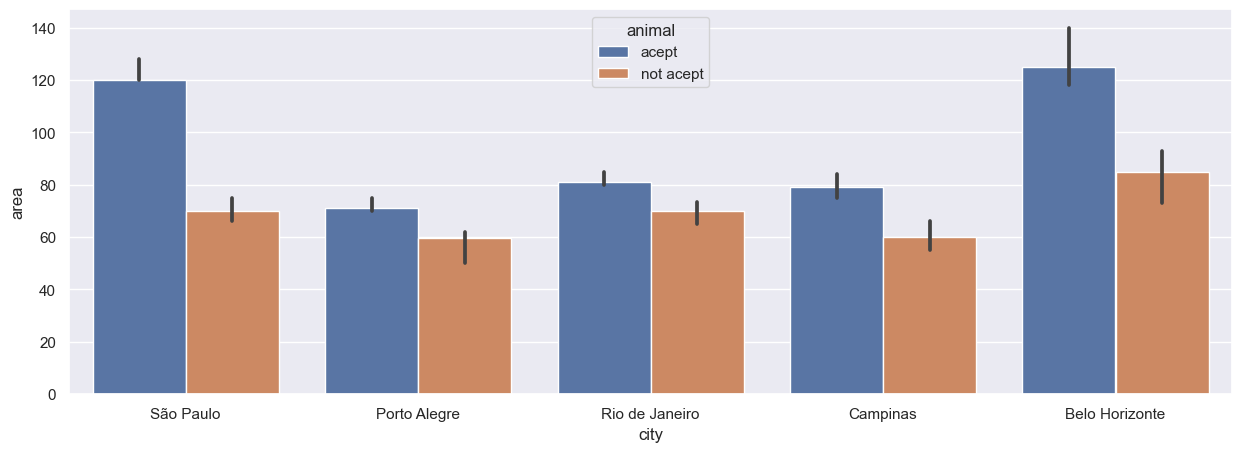

In [151]:
city = df.groupby('animal')['area'].agg(["mean", "median"])
print(city)
plt.figure(figsize= (15,5))
sns.barplot(x= df['city'], y= df['area'],hue=df['animal'],estimator= np.median)
plt.show()

Thus, it can be inferred that almost all the cities where pets are accepted have a higher available house area with Belo Horizonte and Sao Paolo topping the charts. These cities also have a great gap between the area available for houses that accept pet and that do not accept pets.

### Some cities have a higher rate of acceptance of pets

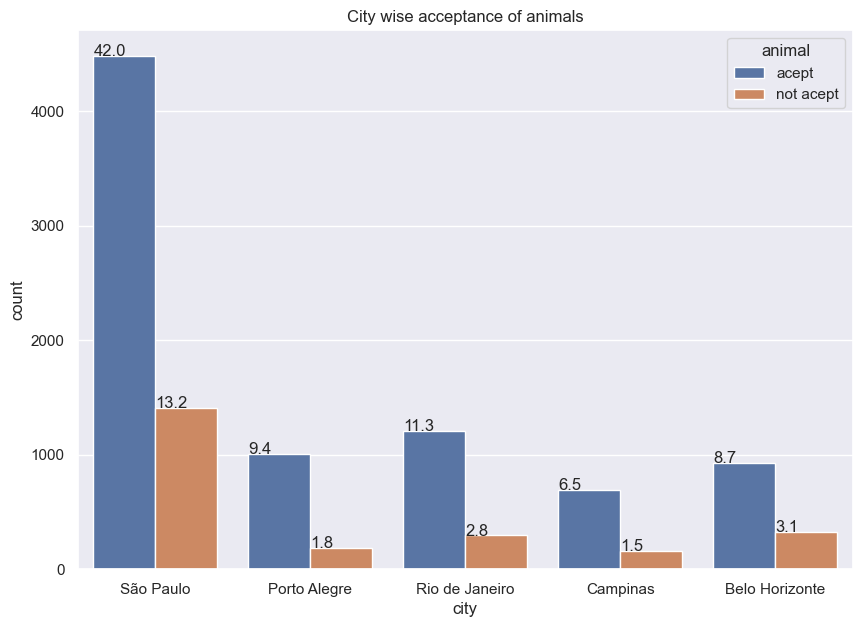

In [152]:
plot_graph(type = "countplot", col = "city", length = 10, width = 7, title = "City wise acceptance of animals", h = "animal")

Thus it can be inferred that Sao Paulo has the highest number of houses with the pet acceptance and it itself has the highest number of houses that do not accept pets. Campinas has the lowest number of pet acceptance.

* ### Wider area has larger rent value;
* ### Having multiple parking spaces increases the area; 
* ### Increase in number of floors increase the house area; 
* ### With an increase in floors, the fire insurance increases; 

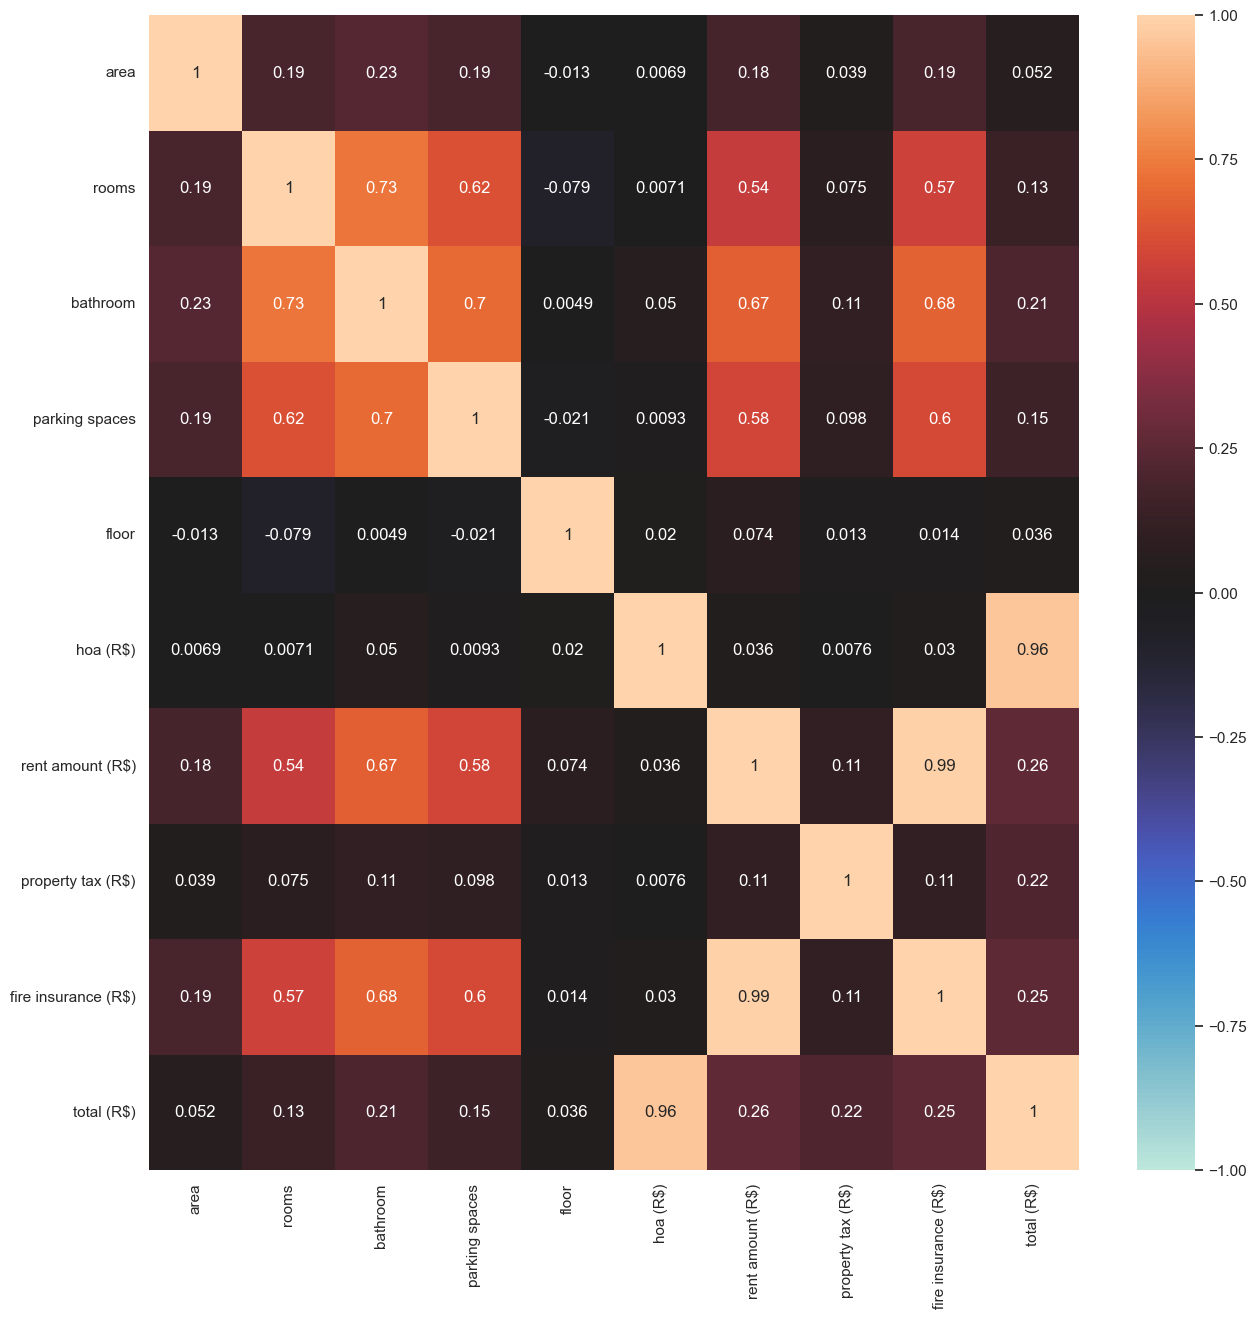

In [153]:
# In order to assess these multiple hypotheses, a heatmap will be used to resolve to present all different relationship
plt.figure(figsize=[15,15])
sns.set(font_scale=1)
sns.heatmap(df.corr(),center=0,annot=True, vmin =-1, vmax = 1)
plt.show()

* Thus, it can be interpreted from above that there's a very weak correlation between wider area and a larger rent value of 0.18.
* Multiple parking spaces have no impact on area with a weak correlation of 0.19.
* The increase in number of floors does not lead to an increase in house area with a weak correlation of -0.013.
* With a very weak correlation of 0.014, the number of floor have no correlation on the fire insurance.

# Conclusion
* #### Property prices differs among different cities and some cities have higher properties prices;
##### Thus, Sao Paulo followed by Rio de Janeiro have the highest estimated prices with the lowest prices in Campinas.
* #### Acceptance of animals impact house prices ;
##### In can be noted that the price of houses for animal owners is high in most cases except for Rio de Janeiro and Porto Alegre
* #### Houses with a higher home owner's association tax have a higher rent value;
##### No ,There is no relation between home owner's association tax and the value of rent, because the city with the top value of comdominum is Rio de Janeiro and the city with the highiest rent value is São Paulo and the Pearson correlation between them is weak 0.30.
* #### Furnished houses have a positive impact on rent value, mentioning a higher rent value;
##### Yes , properties with furniture is more expensive to rent on average 1200 currency notes and the graph shows that all cities have the same pattern.
* #### The number of parking spaces impacts the rent value;
##### Yes , from 0 to 7 the number of parking spaces impact on prices , just when we have 8 parking spaces the value is a little bit lower than 7 and 10 parking spaces is lower than 2 parking spaces. We have a correlation of 0.56 between the price and the number of vacancies confirming the idea that the number of vacancies is related to the value of the property.
* #### The number of bathrooms have an impact on rooms;
##### Thus, it can be assessed that the number of bathrooms have a higher correlation with the number of rooms with a strong correlation of 0.73. Thus, an increase in number of rooms would lead to an increase in number of bathrooms.
* #### Wider area has larger rent value;
##### Thus, it can be interpreted from above that there's a very weak correlation between wider area and a larger rent value of 0.18 
* #### The acceptance of pets impacts the house area;
##### Thus, it can be inferred that almost all the cities where pets are accepted have a higher available house area with Belo Horizonte and Sao Paolo topping the charts. These cities also have a great gap between the area available for houses that accept pet and that do not accept pets.
* #### Having multiple parking spaces increases the area;
##### Multiple parking spaces have no impact on area with a weak correlation of 0.19 
* #### Increase in number of floors increase the house area;
##### The increase in number of floors does not lead to an increase in house area with a weak correlation of -0.013. 
* #### Some cities offer a wider area of houses;
##### Thus, it can be concluded that the areas of all the different cities are statisitcally different and Belo Horizonte tops the bar in terms of area which can be offered to prospective customers
* #### With an increase in floors, the fire insurance increases;
##### With a very weak correlation of 0.014, the number of floor have no correlation on the fire insurance. 
* #### Some cities have higher rate of acceptance of pets
##### Thus it can be inferred that Sao Paulo has the highest number of houses with the pet acceptance and it itself has the highest number of houses that do not accept pets. Campinas has the lowest number of pet acceptance.